Importing libraries & dependencies

In [6]:
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

Data Collection & Pre-processing

In [7]:
#loading data from the csv file
raw_mailData = pd.read_csv('../../data/maildata.csv')
mail_Data = raw_mailData.where(pd.notnull(raw_mailData), '')


In [8]:
#clean test data by removing numbers, punctuations, extra spaces, and lowercases
def clean_Text(text):
    text = text.lower()
    text = re.sub(r'\d+','',text)
    text = re.sub(r'\w+','',text)
    text = re.sub(r'\s+','',text).strip()
    return text

mail_Data['Message'] = mail_Data['Message'].apply(clean_Text)

In [9]:
print (raw_mailData)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [10]:
#relace the null values with a null string
mail_Data = raw_mailData.where((pd.notnull(raw_mailData)),'')

In [11]:
mail_Data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#check the number of rows and columns in the dataframe
mail_Data.shape

(5572, 2)

Label Encoding

In [13]:
#label spam emails as 0 and ham mails as 1
mail_Data.loc[mail_Data['Category'] == 'spam', 'Category',] = 0
mail_Data.loc[mail_Data['Category'] == 'ham', 'Category',] = 1

In [14]:
#seperating the data as texts and label
X = mail_Data['Message']
Y = mail_Data['Category']

In [15]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [16]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


Splitting the data into Training data & Test Data 

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=3)

In [18]:
print(X.shape)
print(X_test.shape)
print(X_train.shape)

(5572,)
(1115,)
(4457,)


Feature Extraction

In [19]:
#transform text data into feature vectors that can be uses as input to the logistic regression
feature_Extraction = TfidfVectorizer(min_df= 1, stop_words='english', lowercase=True, ngram_range=(1,2))

X_train_features = feature_Extraction.fit_transform(X_train) 
X_test_features = feature_Extraction.transform(X_test)

#convert Y_train and Y_test values as integers
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [20]:
print(X_train_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 66644 stored elements and shape (4457, 31435)>
  Coords	Values
  (0, 8112)	0.2293994254809775
  (0, 14826)	0.2057182503216549
  (0, 7568)	0.24434301358060437
  (0, 18286)	0.24656842206800117
  (0, 22197)	0.36661532647299055
  (0, 8133)	0.31161500769677647
  (0, 14857)	0.4157190204122615
  (0, 7612)	0.4360180016166473
  (0, 18319)	0.4360180016166473
  (1, 14826)	0.11393068103790101
  (1, 10985)	0.16374884332311387
  (1, 6576)	0.21606990588335628
  (1, 10659)	0.21606990588335628
  (1, 9802)	0.21101484202602133
  (1, 5978)	0.18213939836318066
  (1, 2393)	0.14958564620310305
  (1, 9726)	0.2222568040268413
  (1, 10664)	0.2222568040268413
  (1, 12912)	0.20674084643339366
  (1, 12131)	0.19420906630127963
  (1, 16501)	0.123483564829971
  (1, 14875)	0.23023310300336708
  (1, 10992)	0.2222568040268413
  (1, 6577)	0.2222568040268413
  (1, 10661)	0.23023310300336708
  :	:
  (4456, 23616)	0.10739046847004557
  (4456, 771)	0.1467796828854

Hyperparameter Tuning

In [21]:
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)

param_grid = {
    'C': [0.01,0.1,1,10],
    'penalty' : ['l1','l2'],
    'class_weight' : [None, 'balanced']
}

grid_Search = GridSearchCV(estimator=log_reg,
                           param_grid=param_grid,
                           scoring='f1',
                           cv = 5,
                           n_jobs = -1,
                           verbose=1)

grid_Search.fit(X_train_features,Y_train)

best_model = grid_Search.best_estimator_

print("Best parameters: ",grid_Search.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


/root/miniforge3/lib/python3.12/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/root/miniforge3/lib/python3.12/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/root/miniforge3/lib/python3.12/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/root/miniforge3/lib/python3.12/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/root/miniforge3/lib/python3.12/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best parameters:  {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2'}


/root/miniforge3/lib/python3.12/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training Machine Learning Model using Logistiic Regression

In [22]:
model = LogisticRegression()

In [23]:
#training the logistric regression model using the training data
model = best_model
model.fit(X_train_features,Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,10
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


Evaluating the trained Model

In [24]:
#prediction on training data
prediction_on_Trainingdata = model.predict(X_train_features)
accuracy_on_TrainingData = accuracy_score(Y_train,prediction_on_Trainingdata)

Accuracy on Training Data:  0.9993269015032533


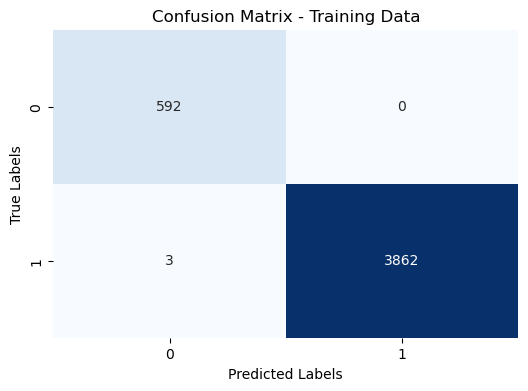


Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       592
           1       1.00      1.00      1.00      3865

    accuracy                           1.00      4457
   macro avg       1.00      1.00      1.00      4457
weighted avg       1.00      1.00      1.00      4457

Macro Average Precision: 0.9975
Macro Average Recall:    0.9996
Weighted Average Precision: 0.9993
Weighted Average Recall:    0.9993


In [25]:
print("Accuracy on Training Data: ",accuracy_on_TrainingData)

#confusion matrix for training data
cm = confusion_matrix(Y_train, prediction_on_Trainingdata)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#classification report for training data
print("\nClassification Report for Training Data:")
print(classification_report(Y_train, prediction_on_Trainingdata))

#check overall precision and recall
precision_Macro = precision_score(Y_train,prediction_on_Trainingdata,average='macro')
recall_Macro = recall_score(Y_train,prediction_on_Trainingdata,average='macro')

precision_weighted = precision_score(Y_train, prediction_on_Trainingdata, average='weighted')
recall_weighted = recall_score(Y_train, prediction_on_Trainingdata, average='weighted')

print(f"Macro Average Precision: {precision_Macro:.4f}")
print(f"Macro Average Recall:    {recall_Macro:.4f}")
print(f"Weighted Average Precision: {precision_weighted:.4f}")
print(f"Weighted Average Recall:    {recall_weighted:.4f}")

In [26]:
#prediction on test data
prediction_on_Testdata = model.predict(X_test_features)
accuracy_on_TestData = accuracy_score(Y_test,prediction_on_Testdata)

Accuracy on Test Data:  0.9856502242152466


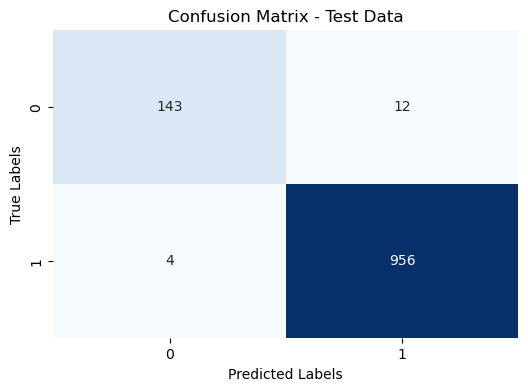


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       155
           1       0.99      1.00      0.99       960

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115

Macro Average Precision: 0.9802
Macro Average Recall:    0.9592
Weighted Average Precision: 0.9855
Weighted Average Recall:    0.9857


In [27]:
print("Accuracy on Test Data: ",accuracy_on_TestData)

#confusion matrix for test data
cm = confusion_matrix(Y_test, prediction_on_Testdata)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#classification report for test data
print("\nClassification Report for Test Data:")
print(classification_report(Y_test, prediction_on_Testdata))

#check overall precision and recall
precision_Macro = precision_score(Y_test,prediction_on_Testdata,average='macro')
recall_Macro = recall_score(Y_test,prediction_on_Testdata,average='macro')

precision_weighted = precision_score(Y_test, prediction_on_Testdata, average='weighted')
recall_weighted = recall_score(Y_test, prediction_on_Testdata, average='weighted')

print(f"Macro Average Precision: {precision_Macro:.4f}")
print(f"Macro Average Recall:    {recall_Macro:.4f}")
print(f"Weighted Average Precision: {precision_weighted:.4f}")
print(f"Weighted Average Recall:    {recall_weighted:.4f}")

Classification Report (Threshold = 0.45): 
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       155
           1       0.99      1.00      0.99       960

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



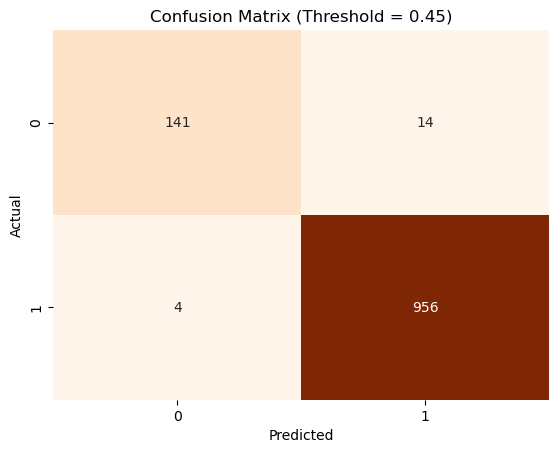

False Positives (FP) (ham predicted as spam emails): 14
False Negatives (FN) (spam predicted as ham emails): 4


In [28]:
#evaluate with custom threshold to reduce false positives
test_Probabilities = model.predict_proba(X_test_features)[:, 1] 

#apply custom threshold
threshold = 0.45

custom_test_preds = (test_Probabilities >= threshold).astype(int)

Y_test_int = Y_test.astype(int)

print(f"Classification Report (Threshold = {threshold}): ")
print(classification_report(Y_test, custom_test_preds))

#custom confusion matrix
cm = confusion_matrix(Y_test, custom_test_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title(f'Confusion Matrix (Threshold = {threshold})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#print false-postives & false negatives
tn,fp,fn,tp = cm.ravel()
print(f"False Positives (FP) (ham predicted as spam emails): {fp}")
print(f"False Negatives (FN) (spam predicted as ham emails): {fn}")

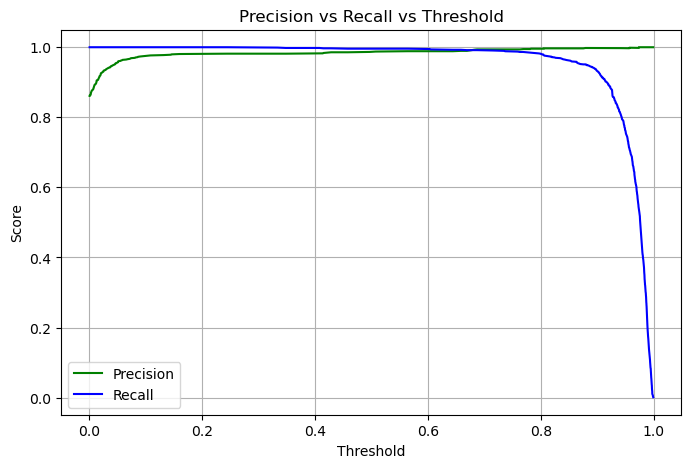

In [29]:
precision_vals, recall_vals, thresholds = precision_recall_curve(Y_test, test_Probabilities)

plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision_vals[:-1], label='Precision', color='green')
plt.plot(thresholds, recall_vals[:-1], label='Recall', color='blue')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision vs Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

Building a Predictive System

In [30]:
input_email = input("Enter an email message: ")
#convert text to feature vectors
input_data_features = feature_Extraction.transform([input_email])  
#making predictions
prediction = model.predict(input_data_features)
if prediction[0] == 0:
    print("Prediction: It's Spam (0)")
else:
    print("Prediction: It's Ham (1)")

Prediction: It's Ham (1)
